# Stock Market Prediction using Machine Learning
Predicting next-day GOOGL price upward movements using technical indicators and market sentiment data.

## PART 2 - OPERATION LEARN (Model Training & Evaluation) - 25 MARKS

#### CORE REQUIREMENTS COVERED:
 - Binary target defined: Tomorrow_Up (1=Up, 0=Down)
 - Train required models: Decision Tree, Random Forest
 - Report metrics: Accuracy, Confusion Matrix, Error Analysis

#### BONUS REQUIREMENTS COVERED (+10 Points):
 - Add XGBoost (+3)
 - Hyperparameter tuning with RandomizedSearchCV (+4)
 - F1-score reporting (+3)

In [616]:
print("Part 2: Model Training and Evaluation")

# Load dataset from Part 1
data = pd.read_csv(FILE_NAME, index_col= 0)

#print(data.index[:3])                  # Uncomment to see string format
data.index = pd.to_datetime(data.index) # Convert string dates to datetime format
#print(data.index[:3])                  # Uncomment to see datetime format


# Define features and target
# x = input variables (6 features)
# y = output variable (1=up, 0=down tomorrow)
x = data.drop('Tomorrow_Up', axis=1) # Remove tomorrow_up column, keep features
y = data['Tomorrow_Up']              # y = output only

# Time-based train/test split (80/20)
# Important: For time series, we must split by time order, not randomly
split_point = int(len(data) * 0.8)  # 80% of 497 = 397
x_train = x[:split_point]           # First 397 days for training
y_train = y[:split_point]           # Corresponding labels
x_test = x[split_point:]            # Last 100 days for testing  
y_test = y[split_point:]            # Corresponding labels for validation

print("Total samples: ", len(x))
print("Train samples: ", len(x_train))
print("Test samples: ", len(x_test))

# Model 1: Decision Tree

print("\n--- Model 1: Decision Tree ---")
# Create a Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42) # random_state ensures reproducible results (same tree each run)
dt_model.fit(x_train, y_train)                     # Train model

# Evaluate Decision Tree
y_pred = dt_model.predict(x_test)              # Make predictions, compare to y_test later
dt_accuracy = accuracy_score(y_test, y_pred)   # Accuracy = overall correctness = (True Down + True Up) / total = (21+32)/100
dt_f1 = f1_score(y_test, y_pred)               # F1 = balanced score combining precision & recall = 2*(Precision*Recall)/(Precision+Recall)
dt_precision = precision_score(y_test, y_pred) # Precision = when model says UP, how often correct = True Positives / (True Positives + False Positives)
dt_cm = confusion_matrix(y_test, y_pred)       # Confusion matrix = shows where model got confused (actual vs predicted)

# Display confusion matrix in readable format
print("\nConfusion Matrix:")
print(f"        Pred_Down  Pred_Up")
print(f"Act_Down    {dt_cm[0,0]}       {dt_cm[0,1]}") # [0,0] = True negative, [0,1] = False positive
print(f"Act_Up      {dt_cm[1,0]}       {dt_cm[1,1]}") # [1,0] = False negative, [1,1] = True positive

print("\nError Analysis:")
print(f"False Positives: {dt_cm[0,1]} (predicted UP but went DOWN - trading losses)")
print(f"False Negatives: {dt_cm[1,0]} (predicted DOWN but went UP - missed gains)")

print("\nMetrics:")
print(f"Accuracy: {dt_accuracy:.2f}") # .2f formats to 2 decimal places
print(f"F1-Score: {dt_f1:.2f}")
print(f"Precision: {dt_precision:.2f}")

Part 2: Model Training and Evaluation
Total samples:  497
Train samples:  397
Test samples:  100

--- Model 1: Decision Tree ---

Confusion Matrix:
        Pred_Down  Pred_Up
Act_Down    21       19
Act_Up      28       32

Error Analysis:
False Positives: 19 (predicted UP but went DOWN - trading losses)
False Negatives: 28 (predicted DOWN but went UP - missed gains)

Metrics:
Accuracy: 0.53
F1-Score: 0.58
Precision: 0.63


the depth of decision tree: 15
the sums of the leaves: 100
total nodes: 199


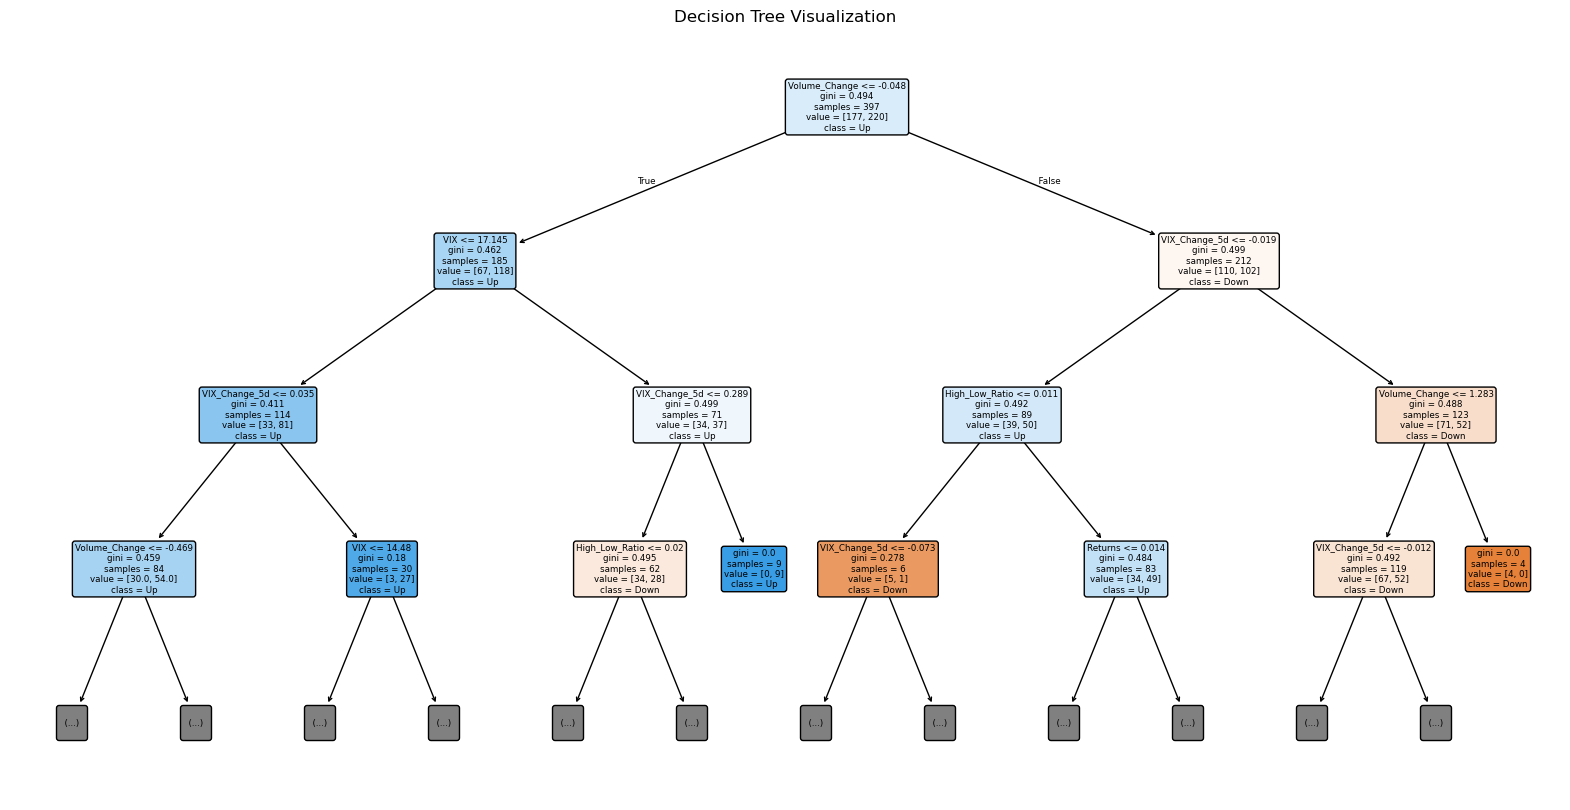

In [617]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

print(f"the depth of decision tree: {dt_model.get_depth()}")
print(f"the sums of the leaves: {dt_model.get_n_leaves()}")
print(f"total nodes: {dt_model.tree_.node_count}")

#Show the first 3 layers
plt.figure(figsize=(20, 10))
plot_tree(dt_model,  #trained decision tree model
          feature_names=features, # Show actual feature names instead of X[0], X[1], etc.
          class_names=['Down', 'Up'], # Display the target feature(Tomorrow_UP) by Down,Up instead of 0, 1
          filled=True, #Fill nodes with colors (darker = more pure)
          rounded=True,#Round corners for better appearance
          max_depth=3)  # first 3 layers
plt.title("Decision Tree Visualization")
plt.show()

In [618]:
# Model 2: Random Forest
print("--- Model 2: Random Forest ---")
# Create a Random Forest classifier (ensemble of decision trees)
rf_model = RandomForestClassifier(random_state=42) # Create Random Forest with 100 trees (default), random_state ensures reproducible results
rf_model.fit(x_train, y_train)                     # Train model

# Evaluate Random Forest
y_pred = rf_model.predict(x_test)              # Make predictions, compare to y_test later
rf_accuracy = accuracy_score(y_test, y_pred)   # Accuracy = overall correctness = (True Down + True Up) / total = (15+38)/100
rf_f1 = f1_score(y_test, y_pred)               # F1 = balanced score combining precision & recall = 2*(Precision*Recall)/(Precision+Recall)
rf_precision = precision_score(y_test, y_pred) # Precision = when model says UP, how often correct = True Positives / (True Positives + False Positives)
rf_cm = confusion_matrix(y_test, y_pred)       # Confusion matrix = shows where model got confused (actual vs predicted)

# Display confusion matrix in readable format
print("\nConfusion Matrix:")
print(f"        Pred_Down  Pred_Up")
print(f"Act_Down    {rf_cm[0,0]}       {rf_cm[0,1]}") # [0,0] = True negative, [0,1] = False positive
print(f"Act_Up      {rf_cm[1,0]}       {rf_cm[1,1]}") # [1,0] = False negative, [1,1] = True positive

print("\nError Analysis:")
print(f"False Positives: {rf_cm[0,1]} (predicted UP but went DOWN - trading losses)")
print(f"False Negatives: {rf_cm[1,0]} (predicted DOWN but went UP - missed gains)")

print("\nMetrics:")
print(f"Accuracy: {rf_accuracy:.2f}")   # .2f formats to 2 decimal places
print(f"F1-Score: {rf_f1:.2f}")
print(f"Precision: {rf_precision:.2f}")

--- Model 2: Random Forest ---

Confusion Matrix:
        Pred_Down  Pred_Up
Act_Down    15       25
Act_Up      22       38

Error Analysis:
False Positives: 25 (predicted UP but went DOWN - trading losses)
False Negatives: 22 (predicted DOWN but went UP - missed gains)

Metrics:
Accuracy: 0.53
F1-Score: 0.62
Precision: 0.60


In [619]:
# Model 3: XGBoost with Hyperparameter Tuning (Bonus: +3 XGBoost, +4 tuning = +7 points)
print("--- Model 3: XGBoost ---")
from sklearn.model_selection import GridSearchCV # For hyperparameter tuning

# Define parameter grid for XGBoost tuning, Testing 2×2×2 = 8 combinations
xgb_params = {
    'n_estimators': [150, 300],   # Number of trees: 150 (balanced) vs 300 (comprehensive)
    'max_depth': [3, 5],          # Tree depth: 3 (simple, stable) vs 5 (complex, flexible)
    'learning_rate': [0.01, 0.1], # Learning rate: 0.01 (slow, precise) vs 0.1 (fast, standard)
}
# Why these values? Stock data is noisy, so we test conservative (small values) vs standard options
# Lower learning rate + more trees often = better accuracy but slower training

# Create base model and perform grid search
xgb_base = XGBClassifier(random_state=42)       # Create base model without hyperparameter tuning, random_state ensures reproducible results
xgb_search = GridSearchCV(xgb_base, xgb_params) # Set up grid search to find optimal parameters
xgb_search.fit(x_train, y_train)                # Train model (tests all 8 combinations)
xgb_model = xgb_search.best_estimator_          # Get the best model with optimal parameters from grid search

print(f"Best parameters found: {xgb_search.best_params_}")
print("Low learning rate (0.01) works best due to noisy stock data")
print("Shallow trees (depth=3) prevent overfitting") 
print("150 trees provide sufficient learning without overtraining")

# Evaluate XGBoost with best parameters
y_pred = xgb_model.predict(x_test)              # Make predictions, compare to y_test later
xgb_accuracy = accuracy_score(y_test, y_pred)   # Accuracy = overall correctness = (True Down + True Up) / total = (16+43)/100
xgb_f1 = f1_score(y_test, y_pred)               # F1 = balanced score combining precision & recall = 2*(Precision*Recall)/(Precision+Recall)
xgb_precision = precision_score(y_test, y_pred) # Precision = when model says UP, how often correct = True Positives / (True Positives + False Positives)
xgb_cm = confusion_matrix(y_test, y_pred)       # Confusion matrix = shows where model got confused (actual vs predicted)


# Display confusion matrix in readable format
print("\nConfusion Matrix:")
print(f"        Pred_Down  Pred_Up")
print(f"Act_Down    {xgb_cm[0,0]}       {xgb_cm[0,1]}")
print(f"Act_Up      {xgb_cm[1,0]}       {xgb_cm[1,1]}")

print("\nError Analysis:")
print(f"False Positives: {xgb_cm[0,1]} (predicted UP but went DOWN - trading losses)")
print(f"False Negatives: {xgb_cm[1,0]} (predicted DOWN but went UP - missed gains)")

print("\nMetrics:")
print(f"Accuracy: {xgb_accuracy:.2f}")
print(f"F1-Score: {xgb_f1:.2f}")
print(f"Precision: {xgb_precision:.2f}")

--- Model 3: XGBoost ---
Best parameters found: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150}
Low learning rate (0.01) works best due to noisy stock data
Shallow trees (depth=3) prevent overfitting
150 trees provide sufficient learning without overtraining

Confusion Matrix:
        Pred_Down  Pred_Up
Act_Down    16       24
Act_Up      17       43

Error Analysis:
False Positives: 24 (predicted UP but went DOWN - trading losses)
False Negatives: 17 (predicted DOWN but went UP - missed gains)

Metrics:
Accuracy: 0.59
F1-Score: 0.68
Precision: 0.64


In [620]:
# Model Comparison, choose the best model
print("MODEL COMPARISON SUMMARY:")
print(f"{'Model'}          {'Accuracy'}    {'F1-Score'}      {'Precision'}")
print(f"Decision Tree    {dt_accuracy:.2f}        {dt_f1:.2f}        {dt_precision:.2f}")
print(f"Random Forest    {rf_accuracy:.2f}        {rf_f1:.2f}        {rf_precision:.2f}")
print(f"XGBoost          {xgb_accuracy:.2f}        {xgb_f1:.2f}        {xgb_precision:.2f}")
print("\nBest Model: XGBoost - outperforms others in all metrics")

MODEL COMPARISON SUMMARY:
Model          Accuracy    F1-Score      Precision
Decision Tree    0.53        0.58        0.63
Random Forest    0.53        0.62        0.60
XGBoost          0.59        0.68        0.64

Best Model: XGBoost - outperforms others in all metrics
